In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
# Load the data
df = pd.read_csv("D:\\Data Science\\Code basics\\py-master\\DeepLearningML\\11_chrun_prediction\\Bank_churn.csv")
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2283,2284,15624633,Kibby,702,France,Male,45,9,74989.58,1,1,1,171014.69,0
4458,4459,15585839,Niu,633,France,Male,37,2,0.00,2,1,0,182258.17,0
149,150,15794413,Harris,416,France,Male,32,0,0.00,2,0,1,878.87,0
2725,2726,15597951,Muir,471,France,Female,58,4,114713.57,1,1,1,36315.03,0
5037,5038,15814923,Sullivan,606,Spain,Male,38,7,128578.52,1,1,1,193878.51,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.drop(['RowNumber','CustomerId','Surname'], axis='columns', inplace=True)

In [6]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [8]:
print_unique_col_values(df)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [9]:
df['Gender'].replace({'Female':1,'Male':0},inplace=True)

In [10]:
df = pd.get_dummies(data=df, columns=['Geography'])
df.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [11]:
df.dtypes

CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France        bool
Geography_Germany       bool
Geography_Spain         bool
dtype: object

In [12]:
for col in df:
    print(f'{col}: {df[col].unique()}')

CreditScore: [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 5

In [13]:
# Have to scale CreditScore, Age, Tenure, EstimatedSalary

cols_to_scale = ['CreditScore', 'Age', 'Tenure', 'EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [14]:
df.sample(2)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
3156,0.684,1,0.310811,0.8,130701.29,1,1,0,0.296742,1,False,True,False
3229,0.468,1,0.648649,0.5,0.00,1,1,0,0.247733,1,True,False,False


In [15]:
# Train test split

X = df.drop('Exited',axis='columns')
y = df['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [16]:
X_train.shape

(8000, 12)

In [17]:
X_test.shape

(2000, 12)

In [18]:
X_train[:10]

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
7751,0.800,1,0.283784,0.6,0.00,2,0,0,0.096273,False,False,True
4154,0.752,0,0.216216,0.3,0.00,2,1,0,0.981478,True,False,False
3881,0.476,1,0.621622,0.3,0.00,1,1,1,0.948551,True,False,False
9238,0.846,1,0.432432,0.4,0.00,2,1,0,0.646869,True,False,False
5210,0.402,0,0.229730,0.7,129717.30,2,0,0,0.434670,True,False,False
7487,0.602,1,0.513514,0.4,0.00,1,0,0,0.421898,True,False,False
7542,0.314,1,0.216216,0.4,0.00,2,1,1,0.303413,False,False,True
7524,0.620,1,0.297297,0.8,167181.01,1,1,1,0.925815,True,False,False
9412,0.750,0,0.108108,0.6,98684.15,1,0,0,0.668609,True,False,False
6377,0.684,0,0.202703,0.9,0.00,1,1,0,0.567526,True,False,False


In [19]:
len(X_train.columns)

12

In [20]:
# Build a model (ANN) in tensorflow/keras
import numpy as np
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(12, input_shape=(12,), activation='relu'), ## Input layer
    keras.layers.Dense(8, activation='relu'), ## Hidden layer
    keras.layers.Dense(1, activation='sigmoid') ## Output layer
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

In [25]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Ensure X_train and y_train are of the correct data type (float32 or float64)
X_train = X_train.astype(np.float32)  # Cast X_train to float32
y_train = y_train.astype(np.float32)  # Cast y_train to float32

model = keras.Sequential([
    keras.layers.Dense(12, input_shape=(12,), activation='relu'),  # Input layer
    keras.layers.Dense(8, activation='relu'), # Hidden layer
    keras.layers.Dense(3, activation='relu'),# Hidden layer
    keras.layers.Dense(1, activation='sigmoid')  # Output layer
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=250)

Epoch 1/250
250/250 [==============================] - 2s 3ms/step - loss: 68.4616 - accuracy: 0.7090
Epoch 2/250
250/250 [==============================] - 1s 3ms/step - loss: 45.6779 - accuracy: 0.7094
Epoch 3/250
250/250 [==============================] - 1s 3ms/step - loss: 26.3614 - accuracy: 0.7188
Epoch 4/250
250/250 [==============================] - 1s 3ms/step - loss: 24.3316 - accuracy: 0.7234
Epoch 5/250
250/250 [==============================] - 1s 4ms/step - loss: 27.2141 - accuracy: 0.7190
Epoch 6/250
250/250 [==============================] - 1s 3ms/step - loss: 24.7165 - accuracy: 0.7141
Epoch 7/250
250/250 [==============================] - 1s 3ms/step - loss: 30.9146 - accuracy: 0.7168
Epoch 8/250
250/250 [==============================] - 1s 4ms/step - loss: 23.4298 - accuracy: 0.7160
Epoch 9/250
250/250 [==============================] - 1s 3ms/step - loss: 28.1883 - accuracy: 0.7063
Epoch 10/250
250/250 [==============================] - 1s 3ms/step - loss: 24.329

In [26]:
# Ensure X_test and y_test are of the correct data type (float32)
X_test = X_test.astype(np.float32)  # Cast X_test to float32
y_test = y_test.astype(np.float32)  # Cast y_test to float32

model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 3ms/step - loss: 0.4504 - accuracy: 0.8015


[0.4503896236419678, 0.8015000224113464]

In [27]:
# Testing the prediction
yp = model.predict(X_test)
yp[:5]

63/63 [==============================] - 0s 2ms/step


array([[0.0131494 ],
       [0.26242304],
       [0.26242304],
       [0.26242304],
       [0.26242304]], dtype=float32)

In [28]:
# The predicted values are in sigmoid output, we need to convert them in between 0 and 1
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [29]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [30]:
y_test[:10]

7054    0.0
442     0.0
3954    0.0
2288    0.0
3196    0.0
6178    0.0
8351    0.0
5658    1.0
2065    0.0
413     1.0
Name: Exited, dtype: float32

In [31]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89      1595
         1.0       0.72      0.03      0.06       405

    accuracy                           0.80      2000
   macro avg       0.76      0.51      0.48      2000
weighted avg       0.79      0.80      0.72      2000



Text(95.72222222222221, 0.5, 'Truth')

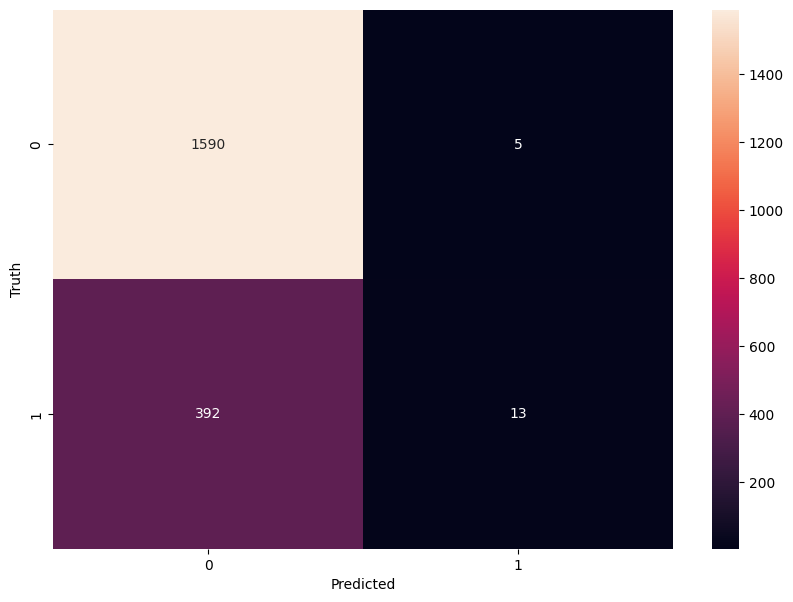

In [32]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')